In [ ]:
##### Q1. Explain the assumptions required to use ANOVA and provide examples of violations that could impact the validity of the results.

##### Ans: 

To use the ANOVA test we made the following assumptions:

1. Each group sample is drawn from a normally distributed population
2. All populations have a common variance
3. All samples are drawn independently of each other Within each sample, the observations are sampled randomly and independently of each other
4. Factor effects are additive

The presence of outliers can also cause problems. In addition, we need to make sure that the F statistic is well behaved. In particular, the F statistic is relatively robust to violations of normality provided:

1. The populations are symmetrical and uni-modal.
2. The sample sizes for the groups are equal and greater than 10

For example, test students from multiple colleges to see if students from one of the colleges consistently outperform students from the other colleges. In a business application, an R&D researcher might test two different processes of creating a product to see if one process is better than the other in terms of cost efficiency.

#### Q2. What are the three types of ANOVA, and in what situations would each be used?


##### Ans: 

There are three types of Anova analysis which we can use based on number of independent variables(Xs) and type of independent variables. But your dependent variable(Y) will remain continuous always.

Figure example explains the types of Anova with an example. In this example “Y” is total sales of a general store in $ which is a continuous variable and it is common for the three examples.

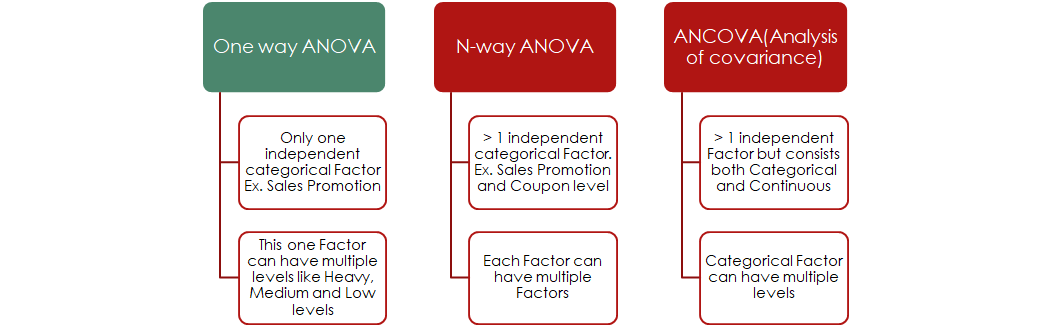


##### Q3. What is the partitioning of variance in ANOVA, and why is it important to understand this concept?


##### Ans: 
The partition property of the variance offers a simple way to summarize a model: the proportion of the total variation in the response variable that is accounted for by the model. This description is called the R² (“R-Squared”) of the model. It is a ratio: 
                                    R2=variance of fitted model values /variance of response values.

R² is the coefficient of determination , but this is not a coefficient in the same sense used to refer to a multiplier in a model formula.

R² has a nice property that makes it easy to interpret: its value is always between zero and one. When R² = 0, the model accounts for none of the variance of the response values: the model is useless. When R² = 1, the model captures all of the variance of the response values: the model values are exactly on target. Typically, R² falls somewhere between zero and one, meaning that the model accounts for some, but not all, of the variance in the response values.


#### Q4. How would you calculate the total sum of squares (SST), explained sum of squares (SSE), and residual
sum of squares (SSR) in a one-way ANOVA using Python?



##### Ans:

Definition

1. Sum of Squares Total (SST) – The sum of squared differences between individual data points (yi) and the mean of the response variable (y).

SST = Σ(yi – y)2

2. Sum of Squares Regression (SSR) – The sum of squared differences between predicted data points (ŷi) and the mean of the response variable(y).

SSR = Σ(ŷi – y)2

3. Sum of Squares Error (SSE) – The sum of squared differences between predicted data points (ŷi) and observed data points (yi).

SSE = Σ(ŷi – yi)2

In [1]:
import pandas as pd

#create pandas DataFrame
df = pd.DataFrame({'hours': [1, 1, 1, 2, 2, 2, 2, 2, 3, 3,
                             3, 4, 4, 4, 5, 5, 6, 7, 7, 8],
                   'score': [68, 76, 74, 80, 76, 78, 81, 84, 86, 83,
                             88, 85, 89, 94, 93, 94, 96, 89, 92, 97]})

#view first five rows of DataFrame
df.head()

,hours,score
0,1,68
1,1,76
2,1,74
3,2,80
4,2,76


In [3]:
# Fit a Regression Model
import statsmodels.api as sm

#define response variable
y = df['score']

#define predictor variable
x = df[['hours']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

# Calculate SST, SSR, and SSE
import numpy as np

#calculate sse
sse = np.sum((model.fittedvalues - df.score)**2)
print(sse)

331.07488479262696

#calculate ssr
ssr = np.sum((model.fittedvalues - df.score.mean())**2)
print(ssr)

917.4751152073725

#calculate sst
sst = ssr + sse
print(sst)

1248.5499999999995

331.07488479262696
917.4751152073725
1248.5499999999995


1248.5499999999995

##### Q5. In a two-way ANOVA, how would you calculate the main effects and interaction effects using Python?


In [8]:
###### Ans:
# Two-Way ANOVA in statistics stands for Analysis of Variance and it is used to check whether there is a statistically significant difference between the mean value of three or more that has been divided into two factors. In simple words, ANOVA is a test conducted in statistics and it is used to interpret the difference between the mean value of at least three groups. 
# The main objective of a two-way ANOVA is to find out how two factors affect a response variable and to find out whether there is a relation between the two factors on the response variable.

# Importing libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Create a dataframe
dataframe = pd.DataFrame({'Fertilizer': np.repeat(['daily', 'weekly'], 15),
						'Watering': np.repeat(['daily', 'weekly'], 15),
						'height': [14, 16, 15, 15, 16, 13, 12, 11,
									14, 15, 16, 16, 17, 18, 14, 13,
									14, 14, 14, 15, 16, 16, 17, 18,
									14, 13, 14, 14, 14, 15]})


# Performing two-way ANOVA
model = ols('height ~ C(Fertilizer) + C(Watering) +\
C(Fertilizer):C(Watering)',
			data=dataframe).fit()
result = sm.stats.anova_lm(model, type=2)
# Print the result
print(result)


# Interpreting the result:

# Following are the p-values for each of the factors in the output:

# 1. The fertilizer p-value is equal to 0.913305
# 2. The Watering p-value is equal to 0.990865
# 3. The Fertilizer * Watering: p-value is equal to 0.904053
# The p-values for water and sun turn out to be less than 0.05 which implies that the means of both the factors possess a statistically significant effect on plant height. 
# The p-value for the interaction effect (0.904053) is greater than 0.05 which depicts that there is no significant interaction effect between fertilizer frequency and watering frequency.

                             df     sum_sq   mean_sq         F    PR(>F)
C(Fertilizer)               1.0   0.033333  0.033333  0.012069  0.913305
C(Watering)                 1.0   1.027463  1.027463  0.372012  0.546828
C(Fertilizer):C(Watering)   1.0   0.133582  0.133582  0.048366  0.827527
Residual                   28.0  77.333333  2.761905       NaN       NaN


##### Q6. Suppose you conducted a one-way ANOVA and obtained an F-statistic of 5.23 and a p-value of 0.02.What can you conclude about the differences between the groups, and how would you interpret these results?

In [ ]:
###### Ans: 

The higher the F-value(5.23) in an ANOVA, the higher the variation between sample means relative to the variation within the samples.
The higher the F-value, the lower the corresponding p-value.
If the p-value (0.02) is below a certain threshold (e.g. α = .05), we can reject the null hypothesis of the ANOVA and conclude that there is a statistically significant difference between group mean

##### Q7. In a repeated measures ANOVA, how would you handle missing data, and what are the potential consequences of using different methods to handle missing data?

In [ ]:
##### Ans: 

##### Q8. What are some common post-hoc tests used after ANOVA, and when would you use each one? Provide an example of a situation where a post-hoc test might be necessary.

##### Ans:

##### Q8. What are some common post-hoc tests used after ANOVA, and when would you use each one? Provide
an example of a situation where a post-hoc test might be necessary.

##### Q9. A researcher wants to compare the mean weight loss of three diets: A, B, and C. They collect data from
50 participants who were randomly assigned to one of the diets. Conduct a one-way ANOVA using Python
to determine if there are any significant differences between the mean weight loss of the three diets.
Report the F-statistic and p-value, and interpret the results.

#### Q10. A company wants to know if there are any significant differences in the average time it takes to
complete a task using three different software programs: Program A, Program B, and Program C. They
randomly assign 30 employees to one of the programs and record the time it takes each employee to
complete the task. Conduct a two-way ANOVA using Python to determine if there are any main effects or
interaction effects between the software programs and employee experience level (novice vs.
experienced). Report the F-statistics and p-values, and interpret the results.

##### Q11. An educational researcher is interested in whether a new teaching method improves student test
scores. They randomly assign 100 students to either the control group (traditional teaching method) or the
experimental group (new teaching method) and administer a test at the end of the semester. Conduct a
two-sample t-test using Python to determine if there are any significant differences in test scores
between the two groups. If the results are significant, follow up with a post-hoc test to determine which
group(s) differ significantly from each other.

##### Q12. A researcher wants to know if there are any significant differences in the average daily sales of three
retail stores: Store A, Store B, and Store C. They randomly select 30 days and record the sales for each store
on those days. Conduct a repeated measures ANOVA using Python to determine if there are any
significant differences in sales between the three stores. If the results are significant, follow up with a posthoc test to determine which store(s) differ significantly from each other.